In [234]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2021, day=13)


def parses(input):
    coords = [tuple(x) for x in parse.findall('{:d},{:d}', input)]
    instructions = [tuple(x) for x in parse.findall('{:l}={:d}', input)]
    return coords, instructions

data = parses(puzzle.input_data)

In [224]:
import parse

In [233]:
[tuple(x) for x in parse.findall('{:l}={:d}', """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5""")]

[('y', 7), ('x', 5)]

In [143]:
sample = parses("""6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5""")

In [144]:
sample

([(6, 10),
  (0, 14),
  (9, 10),
  (0, 3),
  (10, 4),
  (4, 11),
  (6, 0),
  (6, 12),
  (4, 1),
  (0, 13),
  (10, 12),
  (3, 4),
  (3, 0),
  (8, 4),
  (1, 10),
  (2, 14),
  (8, 10),
  (9, 0)],
 [('y', 7), ('x', 5)])

In [155]:
def render(coords, chars='.#'):
    N = max(j for i,j in coords)
    M = max(i for i,j in coords)
    s = ""
    for j in range(N+1):
        for i in range(M+1):
            s += chars[(i,j) in coords]
        s += '\n'
    return s

In [156]:
print(render(sample[0]))

...#..#..#.
....#......
...........
#..........
...#....#.#
...........
...........
...........
...........
...........
.#....#.##.
....#......
......#...#
#..........
#.#........



In [157]:
def fold(coords, instructions):
    coords = set(coords)
    for dim, fold in instructions:
        d = 'xy'.index(dim)
        for point in list(coords):
            if point[d] == fold:
                coords.remove(point)
            if point[d] > fold:
                coords.remove(point)
                coords.add(tuple(v if i != d else 2*fold-v 
                                 for i, v in enumerate(point)))
    return coords

In [158]:
def solve_a(data):
    coords, instructions = data
    return len(fold(coords, instructions[:1]))

In [159]:
solve_a(sample)

17

In [160]:
solve_a(data)

814

In [171]:
coords = fold(*data)

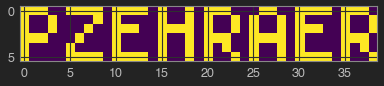

In [176]:

plt.imshow(im.T)

In [236]:
print(render(fold(*data)))

###..####.####.#..#.###...##..####.###.
#..#....#.#....#..#.#..#.#..#.#....#..#
#..#...#..###..####.#..#.#..#.###..#..#
###...#...#....#..#.###..####.#....###.
#....#....#....#..#.#.#..#..#.#....#.#.
#....####.####.#..#.#..#.#..#.####.#..#



In [237]:
print(render(fold(*data), chars=' █'))


███  ████ ████ █  █ ███   ██  ████ ███ 
█  █    █ █    █  █ █  █ █  █ █    █  █
█  █   █  ███  ████ █  █ █  █ ███  █  █
███   █   █    █  █ ███  ████ █    ███ 
█    █    █    █  █ █ █  █  █ █    █ █ 
█    ████ ████ █  █ █  █ █  █ ████ █  █



In [164]:
def solve_b(data):
    print(render(fold(*data), chars=' █'))


In [ ]:
from PIL import Image
import pytesseract

In [ ]:
def overkill_b(data):
    coords = fold(*data)
    N = max(i for i,j in coords)+1
    M = max(j for i,j in coords)+1
    im = np.zeros((N,M))
    for x,y in coords:
        im[x,y] = 1
    im2 = Image.fromarray(255*(1-np.pad(im.T,2))).convert('RGB')
    H, W = im2.size
    imL = im2.resize((H*7,W*7),  Image.NEAREST)
    ocr = pytesseract.image_to_string(imL).strip()
    print(ocr)
    return ocr

'PZEHRAER'

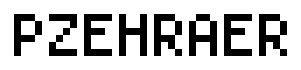

In [223]:
imL

In [165]:
solve_b(sample)

█████
█   █
█   █
█   █
█████



In [166]:
solve_b(data)

███  ████ ████ █  █ ███   ██  ████ ███ 
█  █    █ █    █  █ █  █ █  █ █    █  █
█  █   █  ███  ████ █  █ █  █ ███  █  █
███   █   █    █  █ ███  ████ █    ███ 
█    █    █    █  █ █ █  █  █ █    █ █ 
█    ████ ████ █  █ █  █ █  █ ████ █  █



In [75]:
class BitFont:
    """A BitFont provides logic for plotting pixels from a fixed-height font, using columns of bits indexed from a bytearray"""

    asciiFirst = 32
    asciiEnd = 127
    asciiNewline = ord("\n")

    def __init__(self, file):
        self.file = open(file, "rb")
        # Fonts have constant height but not all have constant width
        self.height = int.from_bytes(self.file.read(1), "big")
        self.widths = [
            int.from_bytes(self.file.read(1), "big")
            for _ in range(self.asciiFirst, self.asciiEnd)
        ]
        self.bounds = [
            int.from_bytes(self.file.read(2), "big")
            for _ in range(self.asciiFirst, self.asciiEnd + 1)
        ]

#     def _load_char(self, char):
#         idx = char - self.asciiFirst
#         start = self.bounds[idx]
#         end = self.bounds[idx + 1]
#         self.file.seek(start)
#         width = self.widths[idx]
#         data = bytearray(self.file.read(end - start))
#         char_buf = framebuf.FrameBuffer(data, width, self.height, framebuf.MONO_HLSB)
#         return char_buf

#     def draw_char(self, char, fbuf, x, y):
#         if isinstance(char, str):
#             char = ord(char)
#         assert self.asciiFirst <= char < self.asciiEnd, "No \b{} in face".format(char)
#         char_buf = self._load_char(char)
#         fbuf.blit(char_buf, x, y, 0)

#     def draw_text(self, line, fbuf, x, y):
#         if isinstance(line, str):
#             line = bytes(line, "ascii")
#         dx, dy = 0, 0
#         for char in line:
#             if char == ord("\n"):
#                 dx = 0
#                 dy += self.height
#             else:
#                 self.draw_char(char, fbuf, x + dx, y + dy)
#                 dx += self.widths[char - self.asciiFirst]


In [120]:
path = '/Users/josejavier/Sync/projects/esp8266/micropython/lib/fonts/5x7.bin'
f = BitFont(path)

In [121]:
ord('A')

65

In [128]:
char = 65
self = f

In [129]:
idx = char - self.asciiFirst
start = self.bounds[idx]
end = self.bounds[idx + 1]
self.file.seek(start)

519

In [130]:
width = self.widths[idx]


In [131]:
data = bytearray(self.file.read(end - start))


In [132]:
[data]

[bytearray(b'`\x90\x90\xf0\x90\x90\x00')]

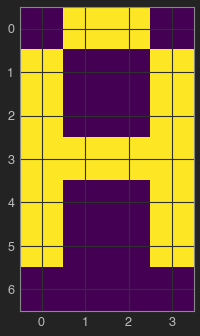

In [135]:
[[int(bool(byte & 2**i)) for i in range(7,3,-1)] for byte in data]

In [119]:
np.frombuffer(data, dtype=np.uint8)

array([  0,  96, 144, 144, 240, 144, 144], dtype=uint8)

In [117]:
[bin(i) for i in np.frombuffer(data, dtype=np.uint8)]

['0b0',
 '0b1100000',
 '0b10010000',
 '0b10010000',
 '0b11110000',
 '0b10010000',
 '0b10010000']

In [111]:
[[int(j) for j in bin(i)[2:]] for i in np.frombuffer(data, dtype=np.uint8)]

[[1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0],
 [0]]